the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-END to 60174.993767 from DATE-END'. [astropy.wcs.wcs]


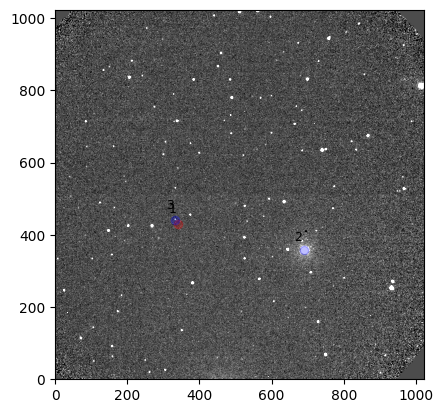

In [25]:
import os
import pandas as pd
from photometry import Photometry
from scripts.tools import sort_files
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
from photometry import Photometry

star_name = "GRB 230818A"
experiment = "all data"
_set = "first"
camera = 3
src_path = os.path.join(
    "..",
    "Pol charact MOPTOP",
    "Scientific objects",
    star_name,
    experiment,
    star_name,
    f"{_set} set",
)

GOOD_IMAGE = {
    "first_cam3": "3_e_20230818_5_16_2_1.fits",
    "second_cam3": "3_e_20230818_6_1_1_1.fits",
    "first_cam4": "4_e_20230818_5_16_2_1.fits",
    "second_cam4": "4_e_20230818_6_1_1_1.fits",
}
file = os.path.join(src_path, GOOD_IMAGE[f"{_set}_cam{camera}"])
image = fits.getdata(file)
median = np.median(image)
std = np.median(np.abs(image - median))
plt.imshow(
    image, vmax=median + 7 * std, vmin=median - 3 * std, origin="lower", cmap="gray"
)

csv_file = os.path.join(src_path, "..", f"objects coordinates.csv")
df = pd.read_csv(csv_file)
objects = {
    "name": df["name"],
    "ra": df[f"ra_{_set}_set_cam{camera}"],
    "dec": df[f"dec_{_set}_set_cam{camera}"],
}
objects = pd.DataFrame.from_dict(objects)
phot = Photometry(file, objects, 20)
phot.reset_object_coords()
for idx, _object in enumerate(phot.obj_list):
    name, x, y, *_ = _object.get_info()
    color = "b"
    if name == "original":
        color = "r"
    plt.plot(x, y, f"{color}o", alpha=0.25)
    plt.annotate(f"{idx+1}", (x * 0.99, y * 1.05), ha="right", va="bottom", fontsize=9)

plt.show()

# Create photometry.csv

In [26]:
objects_photometry = {}
for obj_name in objects["name"]:
    objects_photometry[obj_name] = {
        "mjd": [],
        "xcoord": [],
        "ycoord": [],
        "star_photons": [],
    }
image_list = sort_files(src_path, f"{camera}_e")
for file in image_list:
    file_path = os.path.join(src_path, file)

    phot = Photometry(file_path, objects)
    phot.reset_object_coords()
    phot.calc_psf_radius()
    phot.calc_sky_photons()
    phot.calc_psf_photons()
    mjd = phot.get_mjd()

    for _object in phot.obj_list:
        name, xcoord, ycoord, *_, star_photons = _object.get_info()
        objects_photometry[name]["mjd"].append(mjd)
        objects_photometry[name]["xcoord"].append(xcoord)
        objects_photometry[name]["ycoord"].append(ycoord)
        objects_photometry[name]["star_photons"].append(star_photons)

for obj_name, obj_info in objects_photometry.items():
    df = pd.DataFrame.from_dict(obj_info)
    csv_file = os.path.join(
        src_path, "..", "..", "csv", f"{_set} set", f"{obj_name}_cam{camera}.csv"
    )
    df.sort_values(by=["mjd"])
    df.to_csv(csv_file, index=False)

Set MJD-END to 60174.979820 from DATE-END'. [astropy.wcs.wcs]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
Set MJD-END to 60174.979878 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.979994 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980052 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980110 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980225 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980341 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980399 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980457 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 60174.980515 from DATE-END'. [

# Plot light curve

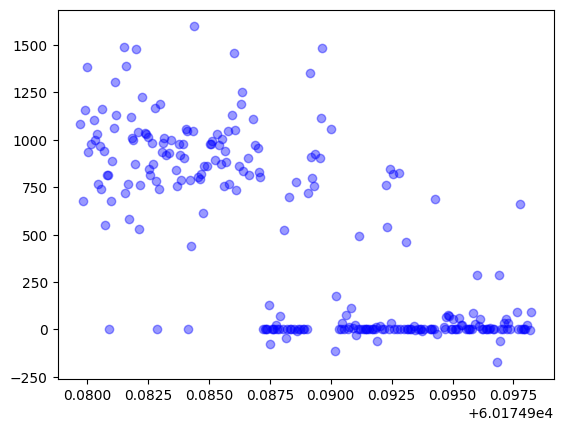

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

star_name = "GRB 230818A"
experiment = "all data"
camera = 3
src_path = os.path.join(
    "..", "Pol charact MOPTOP", "Scientific objects", star_name, experiment
)
csv_path = os.path.join(src_path, "csv")
csv_file = os.path.join(csv_path, "first set", f"candidate_1_cam{camera}.csv")
df = pd.read_csv(csv_file)
median = np.median(df["star_photons"])
# csv_file = os.path.join(csv_path, "second set", f"candidate_1_cam{camera}.csv")
# df_2 = pd.read_csv(csv_file)
# df = pd.concat([df, df_2], axis=0, ignore_index=True)
cand_1 = df["star_photons"]  # / median


plt.plot(df["mjd"], cand_1, "bo", alpha=0.4)
plt.show()

# Plot object coordinates over the image

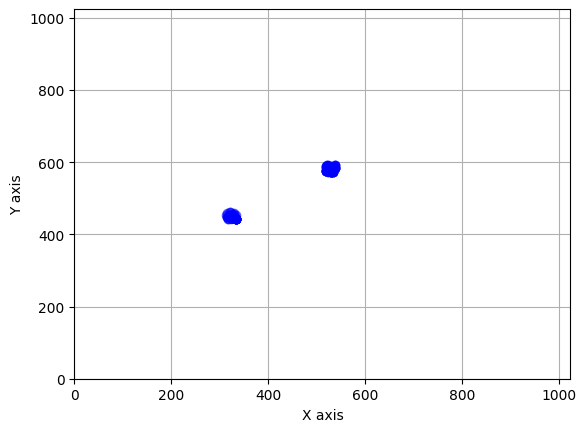

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import os

star_name = "GRB 230818A"
experiment = "all data"
src_path = os.path.join(
    "..", "Pol charact MOPTOP", "Scientific objects", star_name, experiment
)

csv_file = os.path.join(src_path, "csv", "candidate_1.csv")
df = pd.read_csv(csv_file)
plt.plot(df["xcoord"], df["ycoord"], "bo", alpha=0.5)
plt.xlim(0, 1024)
plt.ylim(0, 1024)
plt.xlabel(("X axis"))
plt.ylabel("Y axis")
plt.grid()
plt.show()